# Actividad Evaluable: Patrones con K-means
Eduardo Rodríguez Gil - A01274913,
Jose Manuel Neri Villeda - A01706450,
Héctor Javier Calderón González - A01067542

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Cargamos los datos de entrada del archivo csv

In [5]:
dataframe = pd.read_csv(r"Bitcoin.csv") # Base de datos
dataframe.head()

,Date,Price,Open,High,Low
0,"Apr 25, 2021",49561.9,50088.2,50438.8,49226.5
1,"Apr 24, 2021",50088.9,51140.8,51183.0,48775.2
2,"Apr 23, 2021",51143.6,51707.1,52099.9,47659.4
3,"Apr 22, 2021",51729.5,53821.3,55408.4,50590.9
4,"Apr 21, 2021",53820.2,56479.5,56764.4,53657.6


Para este punto en nuestra base de datos quitamos dos variables la de Volume y la de Change, ya que no hacías un gran cambio en nuestros datos, ya que al momento de graficar no los tomábamos en cuenta al no ser unos valores numéricos.

In [6]:
dataframe.describe()

,Price,Open,High,Low
count,421.000000,421.000000,421.000000,421.000000
mean,21471.073872,21372.344181,22028.754869,20687.659857
std,17492.702670,17448.718099,18024.928136,16785.882734
min,4826.000000,4815.200000,5369.300000,3869.500000
25%,9314.000000,9300.800000,9458.300000,9184.200000
50%,11557.200000,11533.500000,11766.900000,11315.900000
75%,32958.900000,32499.600000,34348.300000,30850.000000
max,63540.900000,63544.200000,64778.000000,62067.500000


In [7]:
# Vemos en cuanto esta el Precio de la Bitcoin
print(dataframe.groupby('Date').size())

Price
4826.0     1
5030.0     1
5182.7     1
5261.1     1
5361.4     1
          ..
61195.3    1
61379.7    1
62980.4    1
63216.0    1
63540.9    1
Length: 421, dtype: int64


# Visualizamos los datos

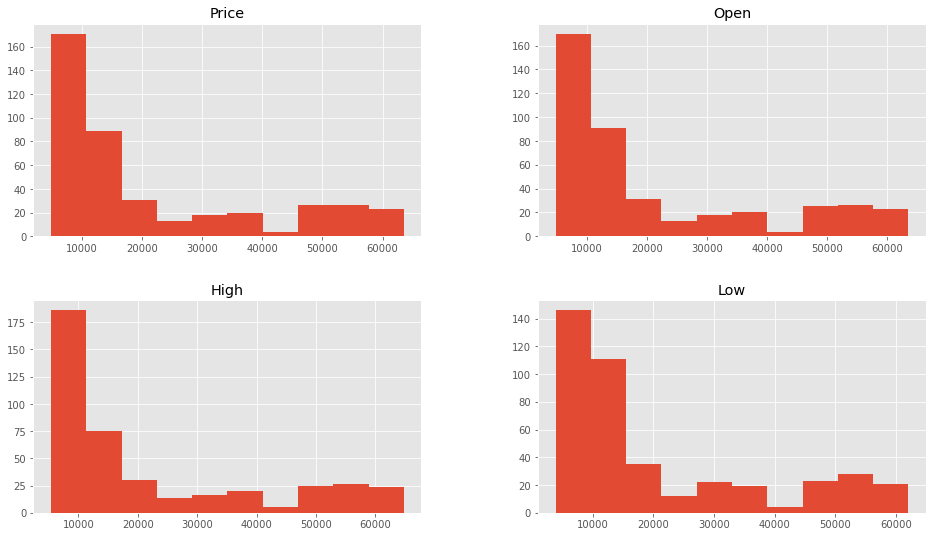

In [16]:
dataframe.drop(['Date'], 1).hist()
plt.show()

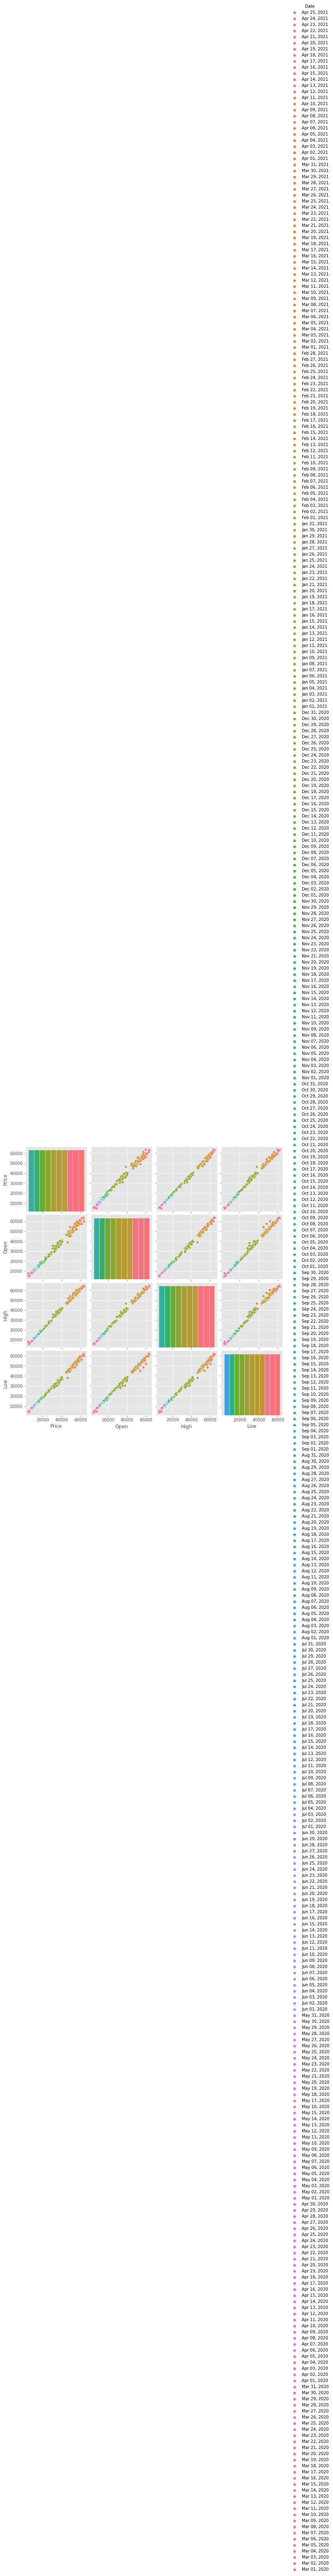

In [22]:
sb.pairplot(dataframe, hue = "Date", diag_kind = "hist");

# Creamos el modelo

In [23]:
# Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["Price", "High", "Low"]])
y = np.array(dataframe['Date'])
X.shape

(421, 3)

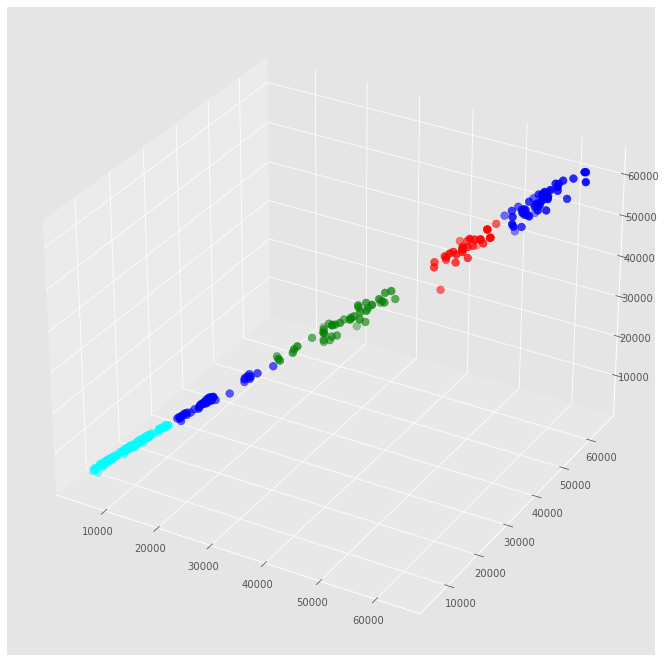

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue', 'red', 'green','blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = []
for row in labels:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60);

# Buscamos el valor K

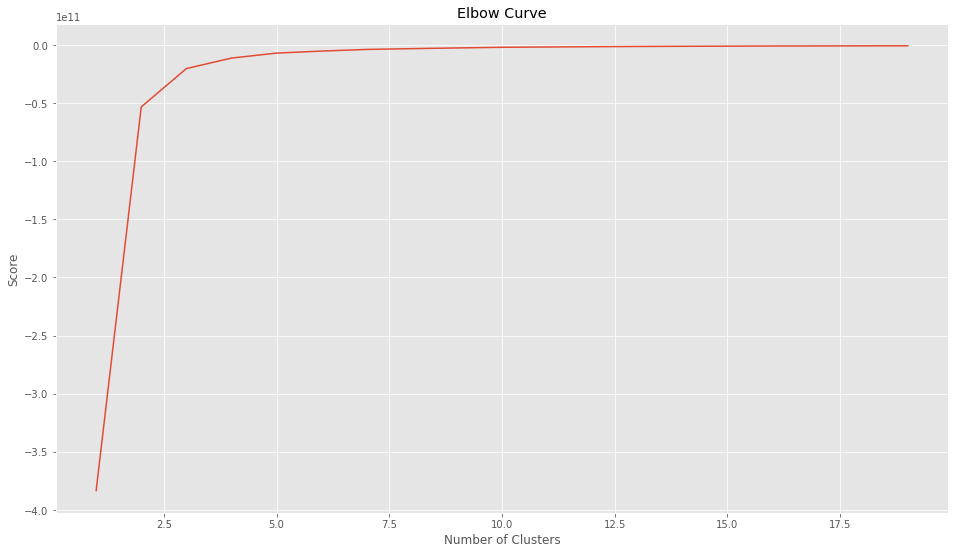

In [25]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [26]:
# Para el ejercicio, elijo 5 como un buen valor de K, pero podría ser otro.
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[18985.90384615 19351.15192308 18280.81538462]
 [48816.53666667 50391.33       46695.24      ]
 [34317.38837209 35616.37906977 32374.81860465]
 [57660.5106383  59107.12978723 55776.62553191]
 [ 9646.05341365  9825.5686747   9415.36787149]]


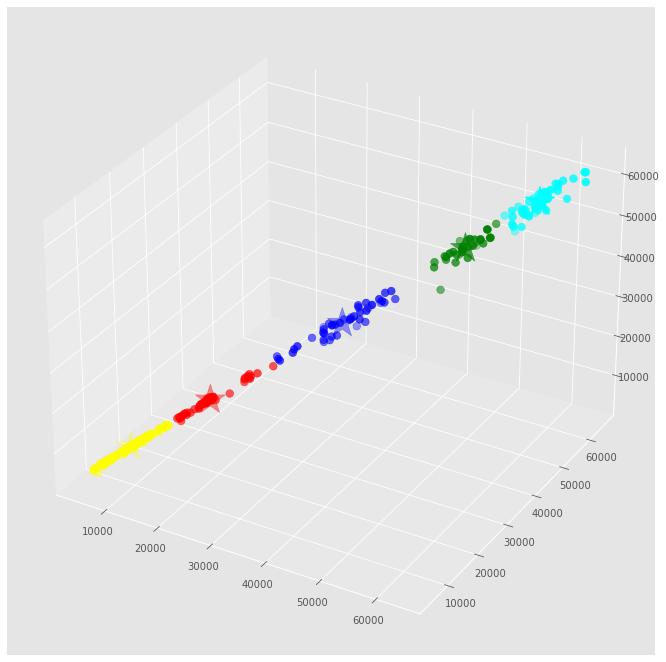

In [27]:
# Obtener las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores = ['red', 'green', 'blue', 'cyan', 'yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000);

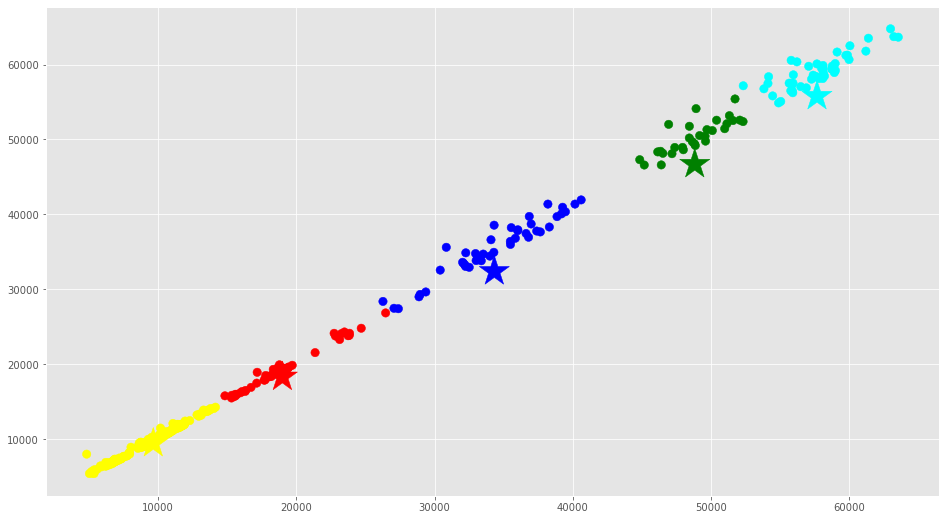

In [28]:
# Hacemos una proyección a 2D con los diversos ejes
f1 = dataframe['Price'].values
f2 = dataframe['High'].values

plt.scatter(f1, f2, c = asignar, s = 70)
plt.scatter(C[:, 0], C[:, 2], marker = '*', c = colores, s = 1000);
plt.show()

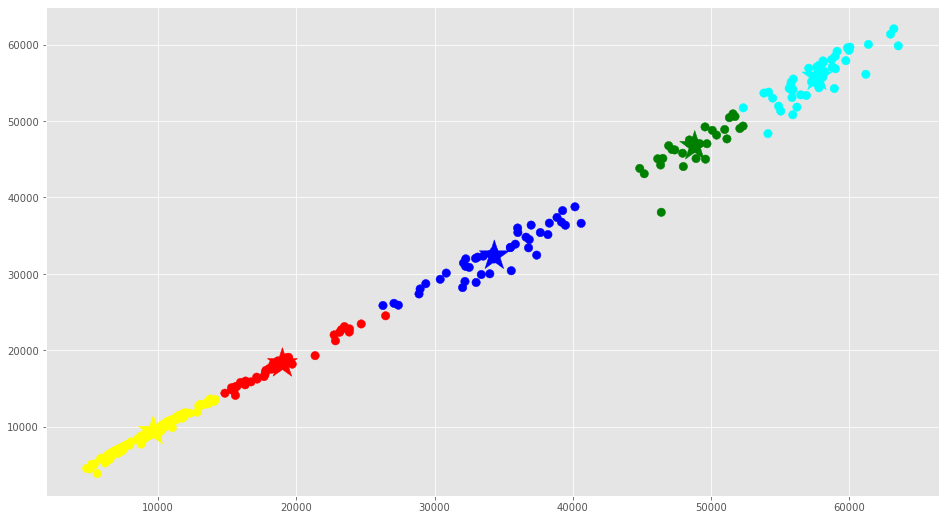

In [29]:
f1 = dataframe['Price'].values
f2 = dataframe['Low'].values

plt.scatter(f1, f2, c = asignar, s = 70)
plt.scatter(C[:, 0], C[:, 2], marker = '*', c = colores, s = 1000);
plt.show()

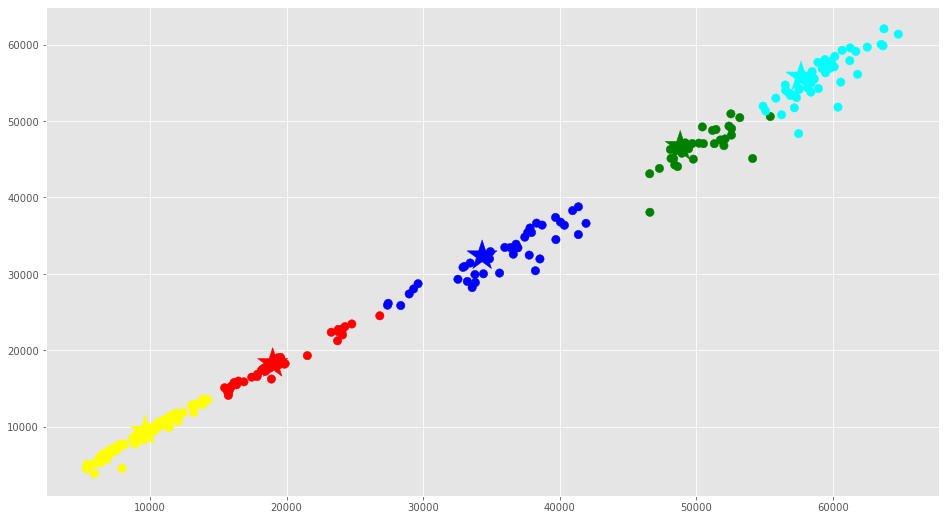

In [30]:
f1 = dataframe['High'].values
f2 = dataframe['Low'].values

plt.scatter(f1, f2, c = asignar, s = 70)
plt.scatter(C[:, 0], C[:, 2], marker = '*', c = colores, s = 1000);
plt.show()

# Evaluando los resultados

In [39]:
print (classification_report(labels, labels));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00       249

    accuracy                           1.00       421
   macro avg       1.00      1.00      1.00       421
weighted avg       1.00      1.00      1.00       421



# Preguntas

**¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?**

Si, ya que nos ayuda a tener un mejor análisis de nuestros datos y a ver los de otra manera.

**¿Cómo obtuviste el valor de k a usar?**

En la actividad decidimos elegir 5 como un buen valor de K para que no nos muestre tantos datos, pero en si pudiéramos a ver elegido cualquier otro valor.

**¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?**

En nuestro punto de vista pensamos que un valor más alto, ya que los datos serian un poco más representativos.

**¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?**

Tienen casi la misma distancia todos los centros entre sí, solo hay uno centro que tiene menos distancia entre otro y esto hace que este más cercano. 

**¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?**

Tendríamos a tener más centros ya que tendríamos más variantes.

**¿Qué puedes decir de los datos basándose en los centros?**

Que casi todos los datos llegan a ser similares entre si y solo uno puede llegar a cambiar un poco en cuanto a los centros.